## Codigo fonte da implementação do landlab para shield stress
> https://github.com/landlab/landlab/blob/c930a865722cb5f4bc6e68afafe81eb9615fed57/landlab/components/stream_power/sed_flux_dep_incision.py

## Import dependencies

In [3]:
from landlab.components import FlowAccumulator, SedDepEroder
from landlab import RasterModelGrid
import landlab
import numpy as np
from pylab import show, figure
from landlab.io import read_esri_ascii

## Load DEM

In [4]:
(mg, z) = read_esri_ascii("bacia_piratini_90m.asc", name="topographic__elevation")
mg.at_node.keys()

['topographic__elevation']

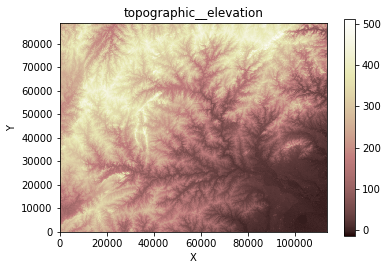

In [5]:
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

## Create flow direction component

In [6]:
fda = FlowAccumulator(mg, 'topographic__elevation')
sde1 = SedDepEroder(mg, Qc="MPM")

/home/joker/.virtualenvs/geo/lib/python3.6/site-packages/landlab/components/stream_power/sed_flux_dep_incision.py:419: UserWarning: Found no incision threshold to use.
  warnings.warn("Found no incision threshold to use.")


## Run Component

In [7]:
# for i in range(30):
fda.run_one_step()
sde1.run_one_step(dt=30) #dt em anos

(RasterModelGrid((987, 1267), xy_spacing=(90.0, 90.0), xy_of_lower_left=(0.0, 0.0)),
 array([ 244.,  241.,  242., ...,  205.,  220.,  228.]))

In [8]:
list(mg.at_node.keys())

['topographic__elevation',
 'water__unit_flux_in',
 'flow__sink_flag',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'channel__bed_shear_stress',
 'channel__discharge',
 'channel_sediment__relative_flux',
 'channel_sediment__volumetric_flux',
 'channel_sediment__volumetric_transport_capacity']

## Draw results

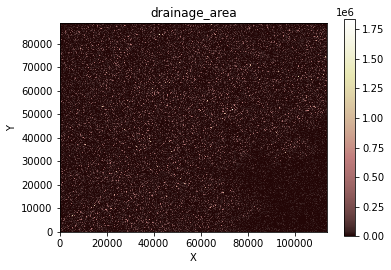

In [9]:
landlab.plot.imshow.imshow_grid_at_node(mg,'drainage_area')

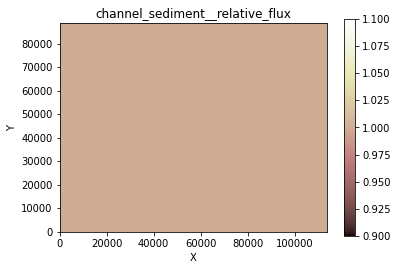

In [10]:
landlab.plot.imshow.imshow_grid_at_node(mg,'channel_sediment__relative_flux')

In [11]:
dir(sde1)

['_C_MPM',
 '_Dchar',
 '_Dchar_in',
 '_K_unit_time',
 '_Qc',
 '_Qs_power_onA',
 '_Qs_power_onAthresh',
 '_Qs_prefactor',
 '_Qs_thresh_prefactor',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_a',
 '_b',
 '_c',
 '_cell_areas',
 '_cite_as',
 '_countactive_links',
 '_current_time',
 '_diffusivity_power_on_A',
 '_flooded_depths',
 '_fluid_density',
 '_g',
 '_grid',
 '_info',
 '_iterations_in_dt',
 '_k_Q',
 '_k_w',
 '_kappa',
 '_lamb_flag',
 '_link_S_with_trailing_blank',
 '_mannings_n',
 '_name',
 '_nu',
 '_override_Dchar',
 '_override_threshold',
 '_phi',
 '_point6onelessb',
 '_pseudoimplicit_repeats',
 '_relative_weight',
 '_return_ch_props',
 '_rho_g',
 '_rock_densi

In [12]:
sde1._shear_stress_prefactor


937.8614242065967

In [13]:
sde1._shields_prefactor_to_shear

833.5652500000001

In [14]:
sde1._shear_stress_prefactor / sde1._shields_prefactor_to_shear

1.1251205879882786

In [15]:
sde1

In [ ]:
import statistics 
statistics.mean(self.shear_stress), max(self.shear_stress), min(self.shear_stress)